In [1]:
import folium 
from folium.features import DivIcon
import geopandas
import geoplot
import pandas as pd
from shapely.geometry import Point, Polygon, shape
import matplotlib.pyplot as plt
import json

In [2]:
m = folium.Map(location=[42.3144556,-71.0403236])

folium.Marker([43.127203,-77.6311032],
                              icon=DivIcon(html='''<i class="fa fa-circle" aria-hidden="true"></i>''')
                              ).add_to(m)

In [3]:
m

In [4]:
import pandas as pd
import numpy as np

In [5]:
business = pd.read_json("yelp_academic_dataset_business.json", lines=True)

In [6]:
business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160580,D2mHoIDXx9N8mS1pGoKV9Q,Eleven Oaks Realty,,Austin,TX,78701,30.272921,-97.744386,4.0,8,1,None,"Real Estate, Real Estate Services, Home Servic...","{'Monday': '9:0-19:0', 'Tuesday': '9:0-19:0', ..."
160581,bQX-kwVTyZgcdZGEPzce6Q,Webb's Honey,21777 State Rd 520,Orlando,FL,32833,28.499836,-81.047478,4.5,18,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Health Markets, Food, Specialty Food, Grocery","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
160582,wvFZ06nmPmQ2-IVoPqVYLA,Painting with a Twist,2164 S Chickasaw Trl,Orlando,FL,32825,28.511615,-81.270020,5.0,8,0,"{'DogsAllowed': 'False', 'ByAppointmentOnly': ...","Arts & Entertainment, Paint & Sip, Art Classes...","{'Monday': '0:0-0:0', 'Wednesday': '12:0-17:0'..."
160583,GB75wPibj3IjNauaoCxyGA,Havana Cafe,910 NW 14th St,Portland,OR,97209,45.529647,-122.685153,4.0,10,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Cuban, Sandwiches, Restaurants, Cafes",None


In [7]:
business["state"].unique()

array(['CO', 'OR', 'FL', 'GA', 'BC', 'OH', 'TX', 'MA', 'WA', 'KS', 'CA',
       'NM', 'NC', 'OK', 'IL', 'NY', 'AZ', 'ON', 'NH', 'DE', 'MN', 'VA',
       'WI', 'WY', 'KY', 'MI', 'DC', 'ME', 'ABE', 'AL', 'HI'],
      dtype=object)

In [8]:
from IPython.display import display
for s in business["state"].unique():
    display(business[business["state"]==s])


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
10,rYs_1pNB_RMtn5WQh55QDA,Chautauqua General Store,100 Clematis Dr,Boulder,CO,80302,39.998449,-105.281006,3.5,5,1,"{'BikeParking': 'True', 'RestaurantsTakeOut': ...","Food, Shopping, Convenience Stores, Souvenir S...","{'Monday': '8:0-20:0', 'Tuesday': '8:0-20:0', ..."
52,Of6xu3pY3eHe2yhiyz2dvg,Taco Bell,3255 28th Street,Boulder,CO,80301,40.033678,-105.259103,1.5,44,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, Tex-Mex, Tacos, Fast Food, Breakf...","{'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W..."
69,QkLMGBIP5Pp040l0Y9L0iA,Valley Chrysler-Dodge,2100 30th St,Boulder,CO,80301,40.021816,-105.252803,2.5,13,0,None,"Car Dealers, Auto Repair, Automotive","{'Monday': '9:0-21:0', 'Tuesday': '9:0-18:0', ..."
158,_8Hejg5Q-_izIhLvq2ocnw,Sancho's Authentic Mexican Restaurant,"6545 Gunpark Dr, Ste 280",Boulder,CO,80301,40.070694,-105.200376,4.0,220,1,"{'BikeParking': 'True', 'GoodForMeal': '{'dess...","Restaurants, Mexican","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160354,3U_cYt7w_iH0UIX92ivZWQ,Colorado Clinic,"3000 Center Green Dr, Ste 120",Boulder,CO,80301,40.029617,-105.246268,2.5,5,0,"{'ByAppointmentOnly': 'True', 'AcceptsInsuranc...","Pain Management, Doctors, Anesthesiologists, S...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
160360,nBq1_lN63fAIaeKR9mobCA,Tutti Frutti Frozen Yogurt,"300 Center Dr, Ste B1F",Superior,CO,80027,39.955584,-105.168126,3.0,19,0,"{'BusinessParking': '{'garage': False, 'street...","Ice Cream & Frozen Yogurt, Food","{'Monday': '12:0-21:0', 'Tuesday': '12:0-21:0'..."
160449,lMuRFZtw-AEEpWbpkM8S8w,Charming Charlie,"1685 29th St, Ste 1268",Boulder,CO,80301,40.016828,-105.256532,4.5,7,0,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Jewelry, Fashion, Shopping, Watches",None
160504,_MumgpliQR5othcemTy27Q,Gerber Collision & Glass,4700 Pearl St,Boulder,CO,80301,40.024836,-105.243599,3.5,19,1,{'BusinessAcceptsCreditCards': 'True'},"Body Shops, Auto Repair, Automotive, Windshiel...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
20,DLbEQySMW3X7KvkybpEYkw,Jasmine Nail Spa,"4370 SE King Rd, Ste 125",Portland,OR,97222,45.447598,-122.617427,3.0,7,0,"{'RestaurantsPriceRange2': '1', 'ByAppointment...","Nail Salons, Beauty & Spas","{'Monday': '9:30-18:0', 'Tuesday': '9:30-18:0'..."
23,j68RDnvOaYEwGcY9cTEHpA,Pittock Mansion,3229 NW Pittock Dr,Portland,OR,97210,45.525259,-122.716227,4.5,406,1,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Tours, Museums, Architectural Tours, Venues & ...","{'Monday': '0:0-0:0', 'Thursday': '10:0-16:0',..."
31,_bZOUUc6Sr_W3BxbOUJacw,Prince of Peace,14175 NW Cornell Rd,Portland,OR,97229,45.530958,-122.823780,3.5,5,1,None,"Education, Preschools","{'Monday': '8:0-15:30', 'Tuesday': '8:0-15:30'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160561,jYgqSazE0gUyI7qq086Dzw,Chart House,5700 SW Terwilliger,Portland,OR,97239,45.483154,-122.682748,3.5,457,1,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Event Planning & Services, Steakhouses, Seafoo...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21..."
160562,cgNDiWCaSlqqxx1A6r65bA,Hop N Cork,17450 Lower Boones Ferry Rd,Lake Oswego,OR,97035,45.399154,-122.737600,4.0,137,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Nightlife, Wine Bars, Beer Bar, Bars, Restaura...","{'Monday': '0:0-0:0', 'Tuesday': '16:0-20:0', ..."
160570,det-KjTfYoG2JfCZG3v04w,Village Home Education Resource Center,5150 SW Watson Ave,Beaverton,OR,97005,45.482428,-122.806687,4.0,9,1,None,"Educational Services, Education",None
160573,Zl6SUy6x9jqjRu2HbtEO6A,Split Dine and Drink,7335 SW Bridgeport Rd,Tigard,OR,97224,45.394457,-122.752535,2.0,48,0,"{'RestaurantsDelivery': 'False', 'GoodForKids'...","American (Traditional), Desserts, American (Ne...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
6,t35jsh9YnMtttm69UCp7gw,Escott Orthodontics,2511 Edgewater Dr,Orlando,FL,32804,28.573998,-81.389284,4.5,7,1,"{'AcceptsInsurance': 'True', 'BusinessAcceptsC...","Dentists, Health & Medical, Orthodontists","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:30', ..."
13,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,Orlando,FL,32806,28.513265,-81.374707,4.5,135,1,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, American (New), Bakeries, Dessert...","{'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18..."
16,GfWJ19Js7wX9rwaHQ7KbGw,Everything POP Shopping & Dining,1050 Century Dr,Orlando,FL,32830,28.350498,-81.542819,3.0,7,1,"{'HasTV': 'False', 'Caters': 'False', 'Busines...","Restaurants, American (New), Food Court, Flowe...","{'Monday': '0:0-0:0', 'Tuesday': '7:0-22:0', '..."
17,MUeUyqhMja-nnmvgP4rBBg,Saratoga Resort Villas,4787 W Irlo Bronson Hwy,Kissimmee,FL,34746,28.330255,-81.469464,3.5,55,0,"{'WiFi': ''free'', 'RestaurantsPriceRange2': '...","Hotels, Vacation Rentals, Hotels & Travel, Eve...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160572,r5Uag1JqYjr2nbxQCVqm8A,Saigon Noodle & Grill,101 N Bumby Ave,Orlando,FL,32803,28.544430,-81.351606,4.5,437,1,"{'Alcohol': 'u'beer_and_wine'', 'RestaurantsAt...","Restaurants, Noodles, Salad, Vietnamese, Veget...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-21:30'..."
160578,rCTPX2ehHPFnHTe0aK9ZPQ,JDM Toyota & Honda Specialist,6629 E Colonial Dr,Orlando,FL,32807,28.566161,-81.298123,4.5,8,1,{'BusinessAcceptsCreditCards': 'True'},"Automotive, Tires, Towing, Auto Repair","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."
160581,bQX-kwVTyZgcdZGEPzce6Q,Webb's Honey,21777 State Rd 520,Orlando,FL,32833,28.499836,-81.047478,4.5,18,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Health Markets, Food, Specialty Food, Grocery","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
160582,wvFZ06nmPmQ2-IVoPqVYLA,Painting with a Twist,2164 S Chickasaw Trl,Orlando,FL,32825,28.511615,-81.270020,5.0,8,0,"{'DogsAllowed': 'False', 'ByAppointmentOnly': ...","Arts & Entertainment, Paint & Sip, Art Classes...","{'Monday': '0:0-0:0', 'Wednesday': '12:0-17:0'..."


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."
15,g7CEhqBIpwTg6ERcMkCmrQ,Finish Line Car Wash,5510 Memorial Dr,Stone Mountain,GA,30083,33.800687,-84.212820,2.5,11,1,{'BusinessAcceptsCreditCards': 'True'},"Oil Change Stations, Smog Check Stations, Auto...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ..."
25,Y2ojrodkbEheGttZF8wYEQ,Wolf Camera and Image,3141 Piedmont Rd NE,Atlanta,GA,30305,33.842808,-84.370455,3.5,15,0,"{'BusinessParking': '{'garage': False, 'street...","Shopping, Photography Stores & Services","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'..."
28,arEXRZYu8220bFBJ3VAh3A,Blake's On The Park,227 10th St NE,Atlanta,GA,30309,33.781475,-84.379955,3.5,170,1,"{'Alcohol': ''full_bar'', 'BusinessParking': '...","Nightlife, Bars, Gay Bars, Sports Bars","{'Monday': '15:0-3:0', 'Tuesday': '15:0-3:0', ..."
40,OmdMTKZe3j4oUkDrpru9VA,"Pickens, Jewelers",480 E Paces Ferry Rd NE,Atlanta,GA,30305,33.838656,-84.372192,4.0,9,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Local Services, Shopping, Jewelry, Jewelry Rep...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-17:0', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160499,P6VbBg5uNhAaANcpwm2cVQ,Moe's Southwest Grill,863 Ponce De Leon Ave,Atlanta,GA,30306,33.773536,-84.359011,2.5,53,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Restaurants, Mexican, Tex-Mex","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
160522,OF1RGkYOeT2xxoi_Xnec7w,Emeril's Atlanta,"3500 Lenox Rd NE, Ste 100",Atlanta,GA,30326,33.852144,-84.365957,3.0,9,0,"{'RestaurantsAttire': ''dressy'', 'GoodForKids...","American (New), Restaurants, Cajun/Creole","{'Monday': '18:0-22:0', 'Tuesday': '18:0-22:0'..."
160536,zbpHTj_CztQBVVdNV3VPzw,Bubbles Salon,1579 Monroe Dr NE,Atlanta,GA,30324,33.798051,-84.369225,4.0,33,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Beauty & Spas, Hair Salons","{'Tuesday': '10:0-19:0', 'Wednesday': '10:0-19..."
160538,b7VmX7kKwe62MiXK-C_uJA,The Point at Westside Apartments,370 Northside Dr NW,Atlanta,GA,30318,33.765081,-84.404720,1.5,10,1,"{'ByAppointmentOnly': 'False', 'BusinessAccept...","Apartments, Real Estate, Home Services","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
5,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
21,AvT2mGkdYwU0ghqDfs-OlQ,Tire Town Auto Service,2032 Hastings Street E,Vancouver,BC,V5L 1T8,49.281059,-123.063019,4.0,6,0,None,"Auto Repair, Automotive, Tires","{'Monday': '9:0-17:30', 'Tuesday': '9:0-17:30'..."
33,QciD6FbNklaJvUbLExD4Nw,ARGO,"3790 Canada Way, Unit 108",Burnaby,BC,V5G 1G4,49.254436,-123.020050,4.0,76,1,"{'WheelchairAccessible': 'False', 'Restaurants...","Food Delivery Services, Food, Restaurants, Med...","{'Monday': '0:0-0:0', 'Tuesday': '11:30-21:0',..."
47,Xi2GGNzOiUS8r6WCFvu-fw,Kerala Kitchen,103- 9386 120 Street,Surrey,BC,V3V 4B9,49.173723,-122.889641,4.0,9,1,"{'BusinessParking': '{'garage': False, 'street...","Indian, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
48,0b9OJG4DWUqhdLotm_La7Q,Mid Century Modern Home,1041 Kingsway,Vancouver,BC,V5V 3C7,49.253741,-123.082838,3.5,9,1,"{'RestaurantsPriceRange2': '3', 'BusinessParki...","Home & Garden, Furniture Stores, Shopping, Ant...","{'Monday': '11:0-18:0', 'Wednesday': '11:0-18:..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160515,4VYP0oy_8DtIavPRyoYVaw,Newport Village Animal Hospital,276 Newport Drive,Port Moody,BC,V3H 5B9,49.283331,-122.825673,2.5,12,1,None,"Pets, Emergency Pet Hospital, Pet Services, Ve...","{'Monday': '8:0-0:0', 'Tuesday': '8:0-0:0', 'W..."
160523,dplKdpONowTjlPZvq0wSRw,Elysian Coffee,"1100 Burrard Street, Suite 102",Vancouver,BC,V6Z 1Y9,49.279845,-123.127654,4.0,53,1,"{'RestaurantsPriceRange2': '1', 'GoodForMeal':...","Coffee Roasteries, Breakfast & Brunch, Food, C...","{'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ..."
160524,qMK4qP4vgtO5EZGxZY2mMA,Rosa Floral Design,3101 Woodbine Dr,North Vancouver,BC,V7R 2S3,49.337629,-123.100670,4.5,7,1,{'RestaurantsDelivery': 'None'},"Shopping, Local Services, Florists, Flowers & ...","{'Monday': '9:30-18:0', 'Tuesday': '9:30-18:0'..."
160540,IVwuyEozdnKAcPeTNWXF4g,Little Burgundy,1035 Robson street,Vancouver,BC,V6E 1A9,49.283913,-123.123754,2.5,20,1,"{'BikeParking': 'True', 'BusinessParking': '{'...","Shoe Stores, Fashion, Accessories, Shopping, W...","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
7,jFYIsSb7r1QeESVUnXPHBw,Boxwood Biscuit,740 S High St,Columbus,OH,43206,39.947007,-82.997471,4.5,11,1,None,"Breakfast & Brunch, Restaurants","{'Saturday': '8:0-14:0', 'Sunday': '8:0-14:0'}"
14,i_t_30RYVUDdZzFIcw80NQ,Uncle Sam's Pawn Shop,225 E Main St,Columbus,OH,43215,39.956615,-82.993302,4.0,5,0,"{'BusinessParking': '{'garage': False, 'street...","Books, Mags, Music & Video, Musical Instrument...","{'Tuesday': '9:0-17:30', 'Wednesday': '9:0-17:..."
114,qH6Elr-dW5FgDzu0eWXRIQ,Goodyear Auto Service,5015 N High St,Columbus,OH,43214,40.064072,-83.019904,4.0,15,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Oil Change Stations, Tires, Auto Repair, Autom...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
123,Gr4-knYkEFGhDehOkaXgxQ,Crimson,4066 Worth Ave,Columbus,OH,43219,40.054475,-82.913255,3.5,7,1,None,"Coffee & Tea, Food",None
124,ZWhzrcikNsX7-AXqm99U8g,Bee Line Alignment,1030 Harmon Ave,Columbus,OH,43223,39.939116,-83.014023,2.5,9,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Automotive, Auto Repair, Wheel & Rim Repair, T...","{'Monday': '8:0-16:30', 'Tuesday': '8:0-16:30'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160519,n0XBqq6qTdEOyrvjX31RNQ,K&G Fashion Superstore,908 Morse Rd,Columbus,OH,43229,40.062611,-82.995824,3.5,6,1,"{'BikeParking': 'False', 'BusinessAcceptsCredi...","Fashion, Men's Clothing, Shopping, Formal Wear...","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
160535,furx9nQDLnKSx3gOxgbGHA,Grinders of Gahanna,921 E Johnstown Rd,Columbus,OH,43230,40.042004,-82.863357,3.5,19,0,"{'BusinessParking': '{'garage': False, 'street...","Food, Sandwiches, Desserts, Italian, Restauran...","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
160539,pFRZvauzfaHeymvSGwNBXw,Senor Tequilas,1993 Hard Rd,Columbus,OH,43235,40.116903,-83.068716,3.0,81,0,"{'RestaurantsTakeOut': 'True', 'WiFi': ''free'...","Bars, Nightlife, Event Planning & Services, Re...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
160555,cjyyjjBQXp2HdvlHKT_bCw,Scramblers,5729 N Hamilton,Columbus,OH,43230,40.073261,-82.863418,3.0,81,1,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...","Breakfast & Brunch, Restaurants, American (Tra...","{'Monday': '6:30-15:0', 'Tuesday': '6:30-15:0'..."


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
8,N3_Gs3DnX4k9SgpwJxdEfw,Lane Wells Jewelry Repair,"7801 N Lamar Blvd, Ste A140",Austin,TX,78752,30.346169,-97.711458,5.0,30,1,"{'RestaurantsPriceRange2': '1', 'ByAppointment...","Shopping, Jewelry Repair, Appraisal Services, ...","{'Monday': '12:15-17:0', 'Tuesday': '12:15-17:..."
9,tXvdYGvlEceDljN8gt2_3Q,Capital City Barber Shop,"615 W Slaughter Ln, Ste 113",Austin,TX,78748,30.172706,-97.799920,4.0,5,0,"{'BusinessAcceptsCreditCards': 'False', 'Resta...","Barbers, Beauty & Spas","{'Monday': '9:0-17:0', 'Tuesday': '9:0-19:0', ..."
24,nTIhpR7MhsALPwg_Hh14EA,DoubleTree by Hilton Hotel Austin,6505 N Interstate 35,Austin,TX,78752,30.326377,-97.704543,3.0,139,1,"{'WiFi': 'u'free'', 'RestaurantsPriceRange2': ...","Hotels, Hotels & Travel, Event Planning & Serv...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
27,8XyEpVdAO0o6iVkVxkWosQ,PS Property Management Company,"2506 S Lamar Blvd, Ste 2",Austin,TX,78704,30.246465,-97.778738,4.5,9,1,{'BusinessAcceptsCreditCards': 'True'},"Home Services, Real Estate, Property Management","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
37,NVfOn7TdnHbaGH97CVB_Qg,McKinley Chiropractic,"5625 Eiger Rd, Ste 160",Austin,TX,78735,30.244902,-97.857409,5.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Accept...","Chiropractors, Health & Medical","{'Monday': '9:0-17:45', 'Tuesday': '12:0-17:45..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160567,TLg7py9H1W0E-F8BAn5OJQ,Austin Stained Concrete and More,5710 Fitchwood Ln,Austin,TX,78749,30.210815,-97.869660,5.0,19,1,{'BusinessAcceptsCreditCards': 'True'},"Masonry/Concrete, Home Services, Flooring","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
160571,wMxsTP8lBlx5jUyiXmFnuQ,Blue Label Granite,"1481 Robert S Light Blvd, Bldg B",Buda,TX,78610,30.063152,-97.837955,5.0,45,1,"{'BusinessParking': '{'garage': False, 'street...","Shopping, Tiling, Building Supplies, Counterto...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
160574,Q78fYV6B6P6GmX07YVgi4g,Maudie’s Hill Country,12506 Shops Pkwy,Bee Cave,TX,78738,30.304761,-97.937394,3.0,310,1,"{'BusinessParking': '{'garage': False, 'street...","Mexican, Bars, Nightlife, Tex-Mex, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '9:0-21:0', '..."
160577,m1Qw53OgkxrWu59oddVf9A,Capital Area Speech & Occupational Therapy,"12710 Research Blvd, Ste 395",Austin,TX,78759,30.431920,-97.765740,4.0,16,1,"{'ByAppointmentOnly': 'True', 'AcceptsInsuranc...","Educational Services, Health & Medical, Occupa...","{'Monday': '8:30-18:30', 'Tuesday': '8:30-18:3..."


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
11,hCABMnKtwo4Y9alQDxh2kw,Star Kreations Salon and Spa,"124 Newbury St, Unit C",Peabody,MA,01960,42.534248,-70.990948,4.0,8,1,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Wigs, Hair Extensions, Hair Salons, Blow Dry/O...","{'Monday': '10:0-15:0', 'Tuesday': '9:0-18:0',..."
12,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,474 Lowell St,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...","Food, Pizza, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
18,6fT0lYr_UgWSCZs_w1PBTQ,Salter School,2 Florence St,Malden,MA,02148,42.427889,-71.073475,2.0,5,1,None,"Specialty Schools, Massage Schools, Middle Sch...","{'Monday': '8:0-20:0', 'Tuesday': '8:0-20:0', ..."
26,hcRxdDg7DYryCxCoI8ySQA,Longwood Galleria,340-350 Longwood Ave,Boston,MA,02215,42.338544,-71.106842,2.5,24,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Restaurants, Shopping, Shopping Centers","{'Monday': '6:30-22:0', 'Tuesday': '6:30-22:0'..."
29,jGennaZUr2MsJyRhijNBfA,Legal Sea Foods,1 Harborside Dr,Boston,MA,02128,42.363442,-71.025781,3.5,856,1,"{'NoiseLevel': 'u'average'', 'BikeParking': 'F...","Sandwiches, Food, Restaurants, Breakfast & Bru...","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160556,87f7kR7nTz8WHnmtLM_S6w,O Ya,9 East St Pl,Boston,MA,02111,42.351408,-71.056867,4.5,737,1,"{'RestaurantsPriceRange2': '4', 'RestaurantsGo...","Japanese, Sushi Bars, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '17:0-21:30',..."
160563,yQL8SrSETbbCI1U5esVJQw,Ciao! Pizza & Pasta,59 Williams St,Chelsea,MA,02150,42.389221,-71.040882,5.0,733,1,"{'GoodForKids': 'True', 'RestaurantsPriceRange...","Restaurants, Pizza, Italian","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
160568,hX-wc8LoHWSWjBwZ84ANcg,Chestnut Green Dental Group,"7 Federal St, Ste 32",Danvers,MA,01923,42.550054,-70.944788,3.0,6,1,"{'ByAppointmentOnly': 'True', 'AcceptsInsuranc...","Health & Medical, Dentists, General Dentistry","{'Monday': '8:0-17:0', 'Thursday': '8:0-17:0',..."
160569,_-nynGfhsMVVWWbAZ6YhTw,The Jury Room,39 Cottage Ave,Quincy,MA,02269,42.249118,-71.001071,3.0,30,0,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, American (New), Nightlife","{'Monday': '11:30-1:0', 'Tuesday': '11:30-1:0'..."


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
43,Yyym58vWvlRPuMCOICWRBw,Shirley's Tape And Shears,102 E 9th St,Vancouver,WA,98660,45.628235,-122.671251,4.5,27,1,"{'BusinessAcceptsCreditCards': 'False', 'ByApp...","Local Services, Sewing & Alterations","{'Monday': '7:0-17:45', 'Tuesday': '7:0-17:45'..."
71,Xg12RikHzyFCgFBApWtcdw,The Golden Dog,"1217 NE 99th St, Ste 107",Vancouver,WA,98665,45.692591,-122.658644,4.0,10,1,None,"Pet Groomers, Pets, Pet Services","{'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:..."
74,Mf9io8WkMyGautXuSSfGTg,Los Potrillos Mexican Restaurant & Bar,10722 NW Lakeshore Ave,Vancouver,WA,98685,45.698889,-122.703543,3.5,63,1,"{'WiFi': 'u'free'', 'Corkage': 'True', 'Restau...","Restaurants, Food Delivery Services, Mexican, ...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
137,t-jwGEBsMYlQYxiiqImpIQ,Ocean King Market,"14930 SE Mill Plain Blvd, Ste 108",Vancouver,WA,98684,45.617405,-122.518675,3.5,27,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Food, Seafood Markets, International Grocery, ...","{'Monday': '9:30-20:0', 'Tuesday': '9:30-20:0'..."
138,JeU01XydOJZBWAnlqHwP7w,Bawarchi Tikka Kabob & Curry House,11115 NE 4th Plain Rd,Vancouver,WA,98662,45.665628,-122.558274,3.0,9,0,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Indian, Restaurants",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160345,93oKJR0k_ySx4p3u1z7IpA,Gentle Dental Vancouver Mall,"8400 NE Vancouver Mall Lp, Ste 105",Vancouver,WA,98662,45.660160,-122.586133,3.0,17,1,"{'ByAppointmentOnly': 'True', 'AcceptsInsuranc...","Dentists, General Dentistry, Orthodontists, He...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ..."
160355,hdAhDuyrPQ_Ufygm9nQxZw,Princess Nails Spa,19171 SE Mill Plain Blvd,Vancouver,WA,98683,45.616297,-122.476453,3.0,74,1,"{'BusinessParking': '{'garage': False, 'street...","Nail Salons, Beauty & Spas","{'Monday': '0:0-0:0', 'Tuesday': '10:0-19:0', ..."
160365,jrI3lt2WRTDCijNdDClE5g,Pacific Towing,2200 E 1st St,Vancouver,WA,98661,45.621137,-122.648662,3.5,19,1,{'BusinessAcceptsCreditCards': 'True'},"Automotive, Towing","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
160529,EPWCqcnk9x83axyYDWSHdg,Aadland Dental,"2702 NE 78th St, Ste 104",Vancouver,WA,98665,45.679136,-122.642603,4.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","General Dentistry, Cosmetic Dentists, Health &...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1140,hWRZaOk4JWUPFhcomdOLwA,Pizza Hut,512 Kunkle Dr,Ellsworth,KS,67439,38.737121,-98.21631,2.0,28,1,"{'NoiseLevel': ''quiet'', 'RestaurantsGoodForG...","Chicken Wings, Restaurants, Italian, Pizza","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1819,SNCRnaSy6E5fHgQuoCmmbQ,Katia Photography,,Portland,CA,97007,45.450153,-122.884911,5.0,11,1,"{'BusinessAcceptsBitcoin': 'False', 'BusinessA...","Shopping, Clothing Rental, Event Planning & Se...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
30599,cjwnQMQOGOYgB5uNmiYWLA,Verizon Authorized Retailer - GoWireless,"4655 SW Griffith Dr, Ste 125",Beaverton,CA,97005,45.486312,-122.796487,2.5,9,0,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Mobile Phones, Telecommunications, Shopping, H...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
47726,l92RJMHpxZgJl7FQuqpW6w,Here We Grow,,Atlanta,CA,30345,33.848419,-84.285812,5.0,6,1,{'GoodForKids': 'True'},"Childbirth Education, Specialty Schools, Presc...","{'Tuesday': '9:0-17:0', 'Thursday': '9:0-17:0'..."
70731,GTfJipjaeicjMvZ7y-AjjQ,Disney Carribean Beach Resort,900 Cayman Way,Orlando,CA,32830,28.362622,-81.541832,2.5,24,1,None,"Beauty & Spas, Pet Adoption, Resorts, Hotels &...","{'Monday': '9:0-21:30', 'Tuesday': '9:0-21:30'..."
71354,rR8Txcf_ZmUV1TzqrWsIkw,Vain Spa,,Irvine,CA,92606,45.421567,-122.667838,5.0,5,1,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Skin Care, Tanning, Beauty & Spas, Spray Tanni...","{'Monday': '9:0-12:0', 'Tuesday': '9:0-12:0', ..."
95203,4mASceBLv2dCuxCeKpsePQ,Diosa Dreads,,Portland,CA,97206,45.463011,-122.599251,4.5,6,1,{'HairSpecializesIn': '{'straightperms': False...,"Hair Stylists, Hair Salons, Beauty & Spas","{'Monday': '0:0-0:0', 'Tuesday': '9:0-19:0', '..."
103921,8wouHFX93woNTDE9YXYsUQ,Kristen Beccia Photography,6005 Osceola Trail,Austin,CA,78738,30.324763,-98.029110,4.5,15,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Session Photography, Pet Services, Event Photo...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
128258,BAt03TGTq4V4371JUJRHmA,San Jose Jazz Summer Fesitval,Plaza De Cesar Chavez Park,San Jose,CA,95113,28.433109,-81.469804,4.0,17,1,"{'OutdoorSeating': 'True', 'GoodForKids': 'Tru...","Nightlife, Music Venues, Festivals, Arts & Ent...",None
130618,iXHVOnpsNZbksn2kx1zcvQ,"New Albany Elite Dental - Andrew E. Skasko, DDS",5101 Forest Dr,New Albany,CA,43054,40.088810,-82.792556,4.5,13,1,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Health & Medical, Dentists, Cosmetic Dentists,...","{'Monday': '8:0-16:0', 'Tuesday': '8:0-16:0', ..."
144056,46is_75wQ5xZgcbcJ_I3-g,Samuel Rivera Photography,13001 Auburn Cove Ln,Orlando,CA,32828,28.514101,-81.153603,5.0,14,1,{'BusinessAcceptsCreditCards': 'True'},"Shopping, Video/Film Production, Event Photogr...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-17:0', '..."


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
7662,0TEUI9ruYezs-a1TKXrEVw,Pro Tech Construction,,Rio Rancho,NM,87124,35.27436,-106.736803,3.5,5,1,"{'BusinessAcceptsBitcoin': 'False', 'BikeParki...","Home Services, Kitchen & Bath, Contractors, Lo...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:0', '..."


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
13087,uscXWN2UzppWs3l-g3hVmg,Traveling Mailbox,,Sanford,NC,27330,28.51902,-81.510689,2.5,31,1,{'BusinessAcceptsCreditCards': 'True'},"Professional Services, Local Services, Mailbox...",None


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
13106,sw666d_8Ypf2A7SESOnEKg,Costco,13200 N Western Ave,Oklahoma City,OK,73114,28.613381,-81.418804,2.5,6,1,"{'BusinessParking': '{'garage': False, 'street...","Shopping, Fashion, Department Stores, Professi...","{'Monday': '10:0-20:30', 'Tuesday': '10:0-20:3..."


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
22726,nKLXkblAhkPsmiugqKYCVA,ACE Rent A Car,4000 N Mannheim Rd,Franklin Park,IL,60131,28.546013,-81.333099,4.0,84,0,None,"Car Rental, Hotels & Travel",None


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
37700,PNLkzWn3gLOcLxTTZa29Fg,Sciuto Tree,,Kings County,NY,11225,40.791953,-73.721749,5.0,7,1,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Home Services, Tree Services","{'Monday': '0:0-0:0', 'Tuesday': '7:0-17:0', '..."
67527,CTLmOcBkApDiAqM1L6P_-Q,Occena Law,"130 Rt, Ste 59",Spring Valley,NY,10977,42.411471,-71.012537,5.0,5,1,None,"Personal Injury Law, Professional Services, La...","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'..."


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
46579,u4T4jza3wutr5dOEWKWQNw,Aroma Sanctum Perfumes,5 Central St,Salem,AZ,01970,42.521364,-70.893689,4.5,24,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Cosmetics & Beauty Supply, Skin Care, Beauty &...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'..."
144711,nn2_WkDglRzFef2YohnDaA,Grand Aesthetics by Donna,"15171 SW Bangy Rd, Ste 135",Lake Oswego,AZ,97035,45.415844,-122.743149,3.5,30,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Hair Salons, Day Spas, Health & Medical, Tatto...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'..."


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
52167,9fJ7gK8SaNvoe0AP_JXZiw,Bernie Hipos Wedding Films,,Toronto,ON,M5C 1T4,49.226695,-122.893603,5.0,7,1,None,"Event Planning & Services, Videographers, Prof...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
62775,0_4ThmueNk_fGd2TcykDeQ,Hot Topic,4700 Kingsway,Burnaby,ON,V5H 4M,49.228268,-122.999424,2.5,5,1,None,"Women's Clothing, Fashion, Shopping, Accessories",None


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
63781,HxamndvmXvPXb69TR-1HLQ,ADT Security Services,18 Clinton Dr,Hollis,NH,03049,42.356023,-71.061627,1.0,16,1,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Security Systems, Home Automation, Home Servic...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
103285,Dxty4sEe63-eKmMKyCcN0w,Piece O Pizza,131 Daniel Webster Hwy,Nashua,NH,03060,42.504846,-71.071029,4.0,17,1,"{'HasTV': 'True', 'BusinessAcceptsCreditCards'...","Restaurants, Food, Italian, Pizza, Food Delive...","{'Wednesday': '16:0-21:0', 'Thursday': '16:0-2..."
114138,jG3oQXo4Wo7oMmqTucIYHA,Joseph Puzzo & Sons,,Danville,NH,03819,42.926725,-71.082299,3.0,6,1,"{'BusinessAcceptsCreditCards': 'False', 'ByApp...","Movers, Home Services","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
132780,sjkHAmL3X_xMeLAm_I7EUQ,The New Hampshire Store,83 Rt 95,Hampton,NH,03842,42.431564,-71.259236,4.0,6,1,"{'RestaurantsPriceRange2': '2', 'ByAppointment...","Convenience Stores, Food, Shopping, Personal S...",None


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
75497,9u8rFNZr30Zlz1q87AABFg,The Village Wine Shop And Bistro,9280 Dublin Rd,Powell,DE,43065,40.15793,-83.1336,4.5,7,1,"{'BusinessParking': '{'garage': False, 'street...","Nightlife, Food, Wine Tasting Room, Beer, Wine...","{'Monday': '13:0-20:0', 'Tuesday': '13:0-20:0'..."


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
84075,HorLV50SgSj2lArWWu4lEA,Caribou Coffee,1001 18th Ave NW,Austin,MN,55912,30.20213,-97.668832,3.5,6,1,"{'RestaurantsPriceRange2': '1', 'BusinessParki...","Food, Coffee & Tea, Bakeries, Cafes, Restaurants","{'Monday': '5:30-20:0', 'Tuesday': '5:30-20:0'..."


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
84535,SZnLkA6yt6ygmnmLJ2GAaA,Little Caesars,4719 Walmsley Blvd,Richmond,VA,23234,49.155176,-123.124627,2.0,7,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Restaurants, Pizza","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
154569,iJHHadqILp7kVl6K6GGBTA,IKEA,1500 Ikea Way,Norfolk,VA,23502,42.135360,-71.068810,3.5,118,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Lighting Stores, Office Equipment, Home & Gard...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-21:0', ..."


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
86865,kTJvfkdYFuIKuRJJi5jVoA,Brooks Brothers,"5700 North Bayshore Drive, Ste E104",Glendale,WI,53217,42.358662,-71.055065,3.5,7,1,"{'RestaurantsPriceRange2': '3', 'BusinessAccep...","Shopping, Women's Clothing, Fashion, Accessori...","{'Monday': '11:0-19:0', 'Tuesday': '11:0-19:0'..."


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
92924,kCuT3xDEMWjzfpN70kIRyg,Good Times Burgers & Frozen Custard,2175 Sugarland Dr,Sheridan,WY,82801,40.022457,-105.260884,1.5,9,1,"{'RestaurantsReservations': 'False', 'Business...","Burgers, Fast Food, Diners, Ice Cream & Frozen...","{'Monday': '10:30-22:0', 'Tuesday': '10:30-22:..."


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
101941,Nt1yt4ManiApH31xm6roBQ,Pizza Hut,543 N Wallace Wilkinson Blvd,Liberty,KY,42539,37.321719,-84.927085,2.0,11,1,"{'Caters': 'False', 'RestaurantsTakeOut': 'Tru...","Chicken Wings, Italian, Restaurants, Pizza","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
103641,4jkgdVMq0oVtlek4WLdQPQ,Club Scientific,833 Laurence Ave,Jackson,MI,49202,33.88134,-84.3786,3.5,6,1,{'GoodForKids': 'True'},"Education, Summer Camps, Active Life",None


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
110342,9tzfM1wTX9PEo4mZriAtOA,"Michael Luong, Acupuncture & Traditional Chine...",252 West Broadway,Vancouver,DC,V5Y 1P6,49.263022,-123.110683,5.0,10,1,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Acupuncture, Traditional Chinese Medicine, Hea...","{'Tuesday': '9:30-18:30', 'Wednesday': '9:0-16..."


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
121516,UNgsiFmUD8t1KHza9qENjg,Winter Hill General Contractor,170 Main St,North Reading,ME,01864,42.582484,-71.113084,3.5,11,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Roofing, Painters, Contractors, Gutter Service...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
129241,WaD_wuvvDFPTrz8ouDPtAw,Kitanoya Guu Garlic,1698 Robson Street,Vancouver,ABE,V6G 1C7,49.29065,-123.133761,4.5,14,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Restaurants, Japanese","{'Monday': '17:30-0:30', 'Tuesday': '17:30-0:3..."


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
144440,OfNahccRfpKdacJVgOdMNw,Maquillage Pro Beauty,"7817 Rockwood Ln, Ste 322",Austin,AL,78757,30.358747,-97.738109,2.5,11,0,"{'ByAppointmentOnly': 'True', 'RestaurantsPric...","Tanning, Beauty & Spas","{'Monday': '10:0-14:0', 'Tuesday': '10:0-18:30..."


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
146916,ph_XqC65-yx8wnOiFQWbYA,A&B Cleaning Service,,Portland,HI,97032,45.505106,-122.675026,4.5,7,1,{'BusinessAcceptsCreditCards': 'True'},"Window Washing, Home Cleaning, Home Services, ...","{'Monday': '9:15-9:45', 'Tuesday': '7:0-19:0',..."


In [9]:
ma = business[business["state"]=="MA"]

In [10]:
bos = ma[ma["city"]=="Boston"]

In [11]:
bos

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
26,hcRxdDg7DYryCxCoI8ySQA,Longwood Galleria,340-350 Longwood Ave,Boston,MA,02215,42.338544,-71.106842,2.5,24,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Restaurants, Shopping, Shopping Centers","{'Monday': '6:30-22:0', 'Tuesday': '6:30-22:0'..."
29,jGennaZUr2MsJyRhijNBfA,Legal Sea Foods,1 Harborside Dr,Boston,MA,02128,42.363442,-71.025781,3.5,856,1,"{'NoiseLevel': 'u'average'', 'BikeParking': 'F...","Sandwiches, Food, Restaurants, Breakfast & Bru...","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ..."
35,iPD8BBvea6YldQZPHzVrSQ,Espresso Minute,334 Mass Ave,Boston,MA,02115,42.342673,-71.084239,4.5,7,0,"{'NoiseLevel': ''quiet'', 'GoodForKids': 'True...","Creperies, Restaurants, Food, Coffee & Tea, Br...","{'Tuesday': '8:0-20:0', 'Wednesday': '8:0-20:0..."
89,WuoNSCjFBH4OQTSNGc4l6w,Toscana European Day Spa & Salon,231 Newbury St,Boston,MA,02116,42.350004,-71.081931,4.0,138,1,"{'ByAppointmentOnly': 'False', 'BusinessParkin...","Beauty & Spas, Hair Salons, Active Life, Day Spas","{'Tuesday': '10:0-18:0', 'Wednesday': '10:0-20..."
154,zHMsnpMPanzRx-A6AwGSdw,Ecco Beauty Hair Salon,"2 Boylston St, Ste 101",Boston,MA,02116,42.352135,-71.063102,3.5,42,1,"{'BusinessParking': '{'garage': True, 'street'...","Day Spas, Tanning, Hair Stylists, Massage, Spr...","{'Monday': '10:0-20:0', 'Wednesday': '11:0-18:..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160501,pXj9QQVummN5ANuseK4CvQ,All Star Pizza Bar,204 Cambridge St,Boston,MA,02114,42.360852,-71.065910,4.5,87,0,"{'BikeParking': 'True', 'GoodForMeal': '{'dess...","Pizza, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
160527,dWIMHmdKbBUeGVqRPMAc9w,JP Oil,525 Centre St,Boston,MA,02130,42.317339,-71.113439,2.5,5,1,None,"Gas Stations, Automotive",None
160531,TmrSdCqKqzrv0rhCHnJOsA,MassMoving,,Boston,MA,02445,42.332803,-71.138910,5.0,6,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Movers","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ..."
160532,o7gK1JweWUr9jGwYzF1Olg,Harrison Deli and Pizza,805 Harrison Ave,Boston,MA,02118,42.335893,-71.074065,3.5,8,0,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Pizza, Delis, Restaurants",None


In [12]:
from folium.plugins import BeautifyIcon
m = folium.Map([42.3144556,-71.0403236])
icon = BeautifyIcon(
    icon_shape='circle-dot', 
    border_color='red', 
    border_width=5,
    background_color='red'
)
m

In [13]:
#for i, row in bos.iloc[["latitude", "longitude"]].iterrows():
#    print(list(row))
#    m.add_child(folium.Marker(location=list(row), 
#                              icon=BeautifyIcon(
#                                    icon_shape='circle-dot', 
#                                    border_color='red', 
#                                    border_width=5,
#                                    background_color='red'
#                              )
#                             )
#               )


In [14]:
attrs = set()
for i, attr in business["categories"].iteritems():
    if attr:
        for a in attr.split():
            attrs.add(a)
len(attrs)

2121

In [15]:
L = []
L2=[]
for s in business["state"].unique():
    bs = business[business["state"]==s]
    for c in bs["city"].unique():
        count = len(bs[bs["city"]==c])
        if count>=10000:
            L.append((s, c, count))
            L2.append(bs[bs["city"]==c])

In [16]:
L

[('OR', 'Portland', 18196),
 ('FL', 'Orlando', 10635),
 ('GA', 'Atlanta', 12611),
 ('BC', 'Vancouver', 10299),
 ('TX', 'Austin', 22412)]

In [17]:
attrs = {}
for i, attr in business["attributes"].iteritems():
    if attr:
        for a in attr.keys():
            try:
                attrs[a]+=1
            except:
                attrs[a]=1
attrs

{'RestaurantsTableService': 19400,
 'WiFi': 59017,
 'BikeParking': 76480,
 'BusinessParking': 98163,
 'BusinessAcceptsCreditCards': 120177,
 'RestaurantsReservations': 45607,
 'WheelchairAccessible': 29370,
 'Caters': 40140,
 'OutdoorSeating': 50128,
 'RestaurantsGoodForGroups': 45381,
 'HappyHour': 15237,
 'BusinessAcceptsBitcoin': 17593,
 'RestaurantsPriceRange2': 92442,
 'Ambience': 43882,
 'HasTV': 44495,
 'Alcohol': 44443,
 'GoodForMeal': 29276,
 'DogsAllowed': 18308,
 'RestaurantsTakeOut': 58412,
 'NoiseLevel': 39193,
 'RestaurantsAttire': 40723,
 'RestaurantsDelivery': 54485,
 'GoodForKids': 56850,
 'ByAppointmentOnly': 49748,
 'AcceptsInsurance': 7168,
 'HairSpecializesIn': 1193,
 'GoodForDancing': 4758,
 'BestNights': 5526,
 'Music': 7198,
 'BYOB': 3519,
 'CoatCheck': 5188,
 'Smoking': 4419,
 'DriveThru': 6038,
 'BYOBCorkage': 3667,
 'Corkage': 3973,
 'RestaurantsCounterService': 40,
 'AgesAllowed': 97,
 'DietaryRestrictions': 68,
 'Open24Hours': 42}

In [18]:
for att in attrs:
    print(att)

RestaurantsTableService
WiFi
BikeParking
BusinessParking
BusinessAcceptsCreditCards
RestaurantsReservations
WheelchairAccessible
Caters
OutdoorSeating
RestaurantsGoodForGroups
HappyHour
BusinessAcceptsBitcoin
RestaurantsPriceRange2
Ambience
HasTV
Alcohol
GoodForMeal
DogsAllowed
RestaurantsTakeOut
NoiseLevel
RestaurantsAttire
RestaurantsDelivery
GoodForKids
ByAppointmentOnly
AcceptsInsurance
HairSpecializesIn
GoodForDancing
BestNights
Music
BYOB
CoatCheck
Smoking
DriveThru
BYOBCorkage
Corkage
RestaurantsCounterService
AgesAllowed
DietaryRestrictions
Open24Hours


In [19]:
for i in  business["attributes"]:
    if i:
        if "BYOB" in i:
            print(i["BYOB"])

False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
True
False
False
False
False
True
False
False
True
False
False
False
False
False
False
True
False
False
False
True
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
False
True
False
True
False
False
False
False
False
True
False
False
False
False
False
False
False
True
False
False
True
Fa

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
True
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
True
False
False
None
True
True
False
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
False
False
False
False
False
False
False
True
False
False
True
True
False
True
False
True
False
False
False
False
False
True
False
False
False
True
False
False
False
False
False
True
False
False
True
True
False
False
False
True
False
False
False
False
False
False
False
False
False
True
False
False
False
False
True
False
False
False
False
False
False
True
False
False
False
False
False
False
True
False
True
False
False
True
False
False
False
True
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fal

In [20]:
attrs = {}
for i, attr in business["categories"].iteritems():
    if attr:
        for a in attr.split():
            try:
                attrs[a]+=1
            except:
                attrs[a]=1
attrs

{'Gastropubs,': 420,
 'Food,': 31667,
 'Beer': 942,
 'Gardens,': 173,
 'Restaurants,': 37191,
 'Bars,': 15760,
 'American': 12205,
 '(Traditional),': 5260,
 'Bar,': 647,
 'Nightlife,': 9872,
 'Breweries': 153,
 'Salad,': 2148,
 'Soup,': 783,
 'Sandwiches,': 5758,
 'Delis,': 1466,
 'Cafes,': 2523,
 'Vegetarian': 301,
 'Antiques,': 460,
 'Fashion,': 5456,
 'Used,': 815,
 'Vintage': 815,
 '&': 117564,
 'Consignment,': 662,
 'Shopping,': 20661,
 'Furniture': 2218,
 'Stores,': 8344,
 'Home': 26472,
 'Garden': 929,
 'Beauty': 18350,
 'Spas,': 14865,
 'Hair': 13476,
 'Salons': 3228,
 'Gyms,': 1898,
 'Active': 9231,
 'Life,': 7199,
 'Interval': 253,
 'Training': 461,
 'Fitness': 4742,
 'Instruction': 881,
 'Thai': 432,
 'Dentists,': 4619,
 'Health': 16149,
 'Medical,': 11694,
 'Orthodontists': 140,
 'Breakfast': 5565,
 'Brunch,': 4440,
 'Restaurants': 13635,
 'Jewelry': 796,
 'Repair,': 8225,
 'Appraisal': 105,
 'Services,': 46461,
 'Local': 13965,
 'Jewelry,': 1346,
 'Engraving,': 30,
 'Gold'

In [21]:
L = []
for i in business["categories"]:
    if i:
        if "Restaurants" in i:
            L.append(True)
        else:
            L.append(False)
    else:
        L.append(False)

In [22]:
business = business[L]

In [23]:
L = []
L2=[]
for s in business["state"].unique():
    bs = business[business["state"]==s]
    for c in bs["city"].unique():
        count = len(bs[bs["city"]==c])
        if count>=1000:
            L.append((s, c, count))
            L2.append(bs[bs["city"]==c])

In [24]:
L

[('OR', 'Portland', 5729),
 ('BC', 'Vancouver', 4275),
 ('OH', 'Columbus', 2631),
 ('MA', 'Boston', 2845),
 ('FL', 'Orlando', 3748),
 ('TX', 'Austin', 4956),
 ('GA', 'Atlanta', 4179)]

In [25]:
for i, row in enumerate(L2):
    row.to_csv(f"Rest_{L[i][0]}_{L[i][1]}.csv")

C:\Users\Wumin\anaconda3\envs\DM\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


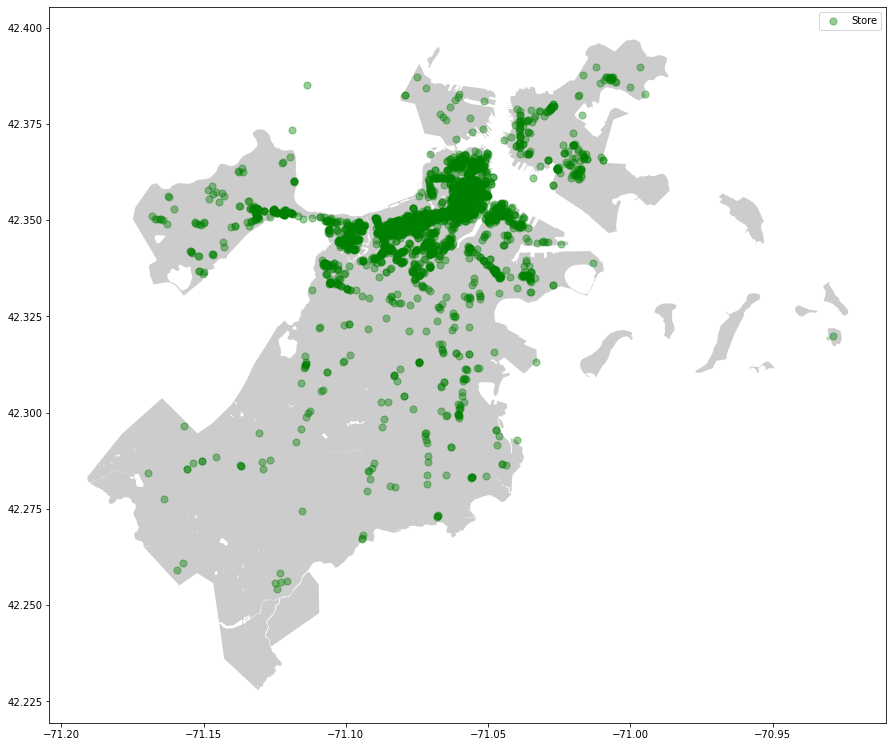

In [75]:
store_locDF=L2[3]

crs={'init':'epsg:4326'}

boroughs = geopandas.read_file("map//boston/City_of_Boston_Boundary.geojson")
boroughs = [shape(i) for i in boroughs["geometry"]]
boroughs = geopandas.GeoDataFrame({'geometry':boroughs})

geo_df=geopandas.GeoDataFrame(store_locDF,crs=crs,geometry=geopandas.points_from_xy(store_locDF["longitude"], store_locDF["latitude"]))

fig,ax=plt.subplots(figsize=(15,15))
boroughs.plot(ax=ax,alpha=0.4,color="grey")
geo_df.plot(ax=ax,markersize=50, alpha=0.4,color="green", label="Store")
plt.legend()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,geometry
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...",POINT (-122.59333 45.58891)
36,jx91IMdGOmLOo8h_F9z39g,Cleary's Restaurant & Spirits,12429 NE Glisan St,Portland,OR,97230,45.526473,-122.535323,3.5,19,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Nightlife, Sandwiches, Seafood, Restaurants","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...",POINT (-122.53532 45.52647)
50,5PsApTz-WqhF_-8mfqGtGw,Cafe Yumm!,301 SW Morrison St,Portland,OR,97204,45.518450,-122.675723,3.5,158,1,"{'OutdoorSeating': 'True', 'GoodForKids': 'Tru...","Vegetarian, Vegan, Sandwiches, Soup, American ...","{'Monday': '10:0-17:0', 'Tuesday': '10:0-17:0'...",POINT (-122.67572 45.51845)
93,HMXiuCxHDXqMH1hBpaHd9g,Whole Time Chicken,,Portland,OR,97215,45.516241,-122.597527,5.0,7,0,"{'OutdoorSeating': 'True', 'RestaurantsTableSe...","Food Stands, Restaurants, Sandwiches","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'...",POINT (-122.59753 45.51624)
94,ZA3u0Nu5V6TqkcYh8U0zdg,B Street Coffee House,2190 W Burnside St,Portland,OR,97210,45.523074,-122.696206,4.5,131,0,"{'Caters': 'False', 'RestaurantsAttire': 'u'ca...","Restaurants, Food, Sandwiches, Breakfast & Bru...","{'Monday': '6:30-15:0', 'Tuesday': '6:30-15:0'...",POINT (-122.69621 45.52307)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160521,68nXXzFyK8tzcBlv8eM3tw,McMenamins Barley Mill Pub,1629 S.E. Hawthorne Blvd.,Portland,OR,97214,45.512422,-122.648782,3.5,108,1,"{'HasTV': 'True', 'NoiseLevel': 'u'average'', ...","Pubs, Breweries, Food, American (Traditional),...","{'Monday': '12:0-20:0', 'Tuesday': '12:0-20:0'...",POINT (-122.64878 45.51242)
160537,ER_VMRSD-9FSbw4SGGNQvA,Seaplane,2266 NW Lovejoy St,Portland,OR,97210,45.529592,-122.697685,3.5,13,0,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Fashion, Men's Clothing, Restaurants, Shopping...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'...",POINT (-122.69769 45.52959)
160547,m5eUPVD0Hu39Ff-Uqe-FLA,The Italian Joint,3145 SE Hawthorne Blvd,Portland,OR,97203,45.512196,-122.632865,3.5,20,0,"{'RestaurantsGoodForGroups': 'False', 'GoodFor...","Italian, Restaurants",None,POINT (-122.63287 45.51220)
160561,jYgqSazE0gUyI7qq086Dzw,Chart House,5700 SW Terwilliger,Portland,OR,97239,45.483154,-122.682748,3.5,457,1,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Event Planning & Services, Steakhouses, Seafoo...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21...",POINT (-122.68275 45.48315)


C:\Users\Wumin\anaconda3\envs\DM\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


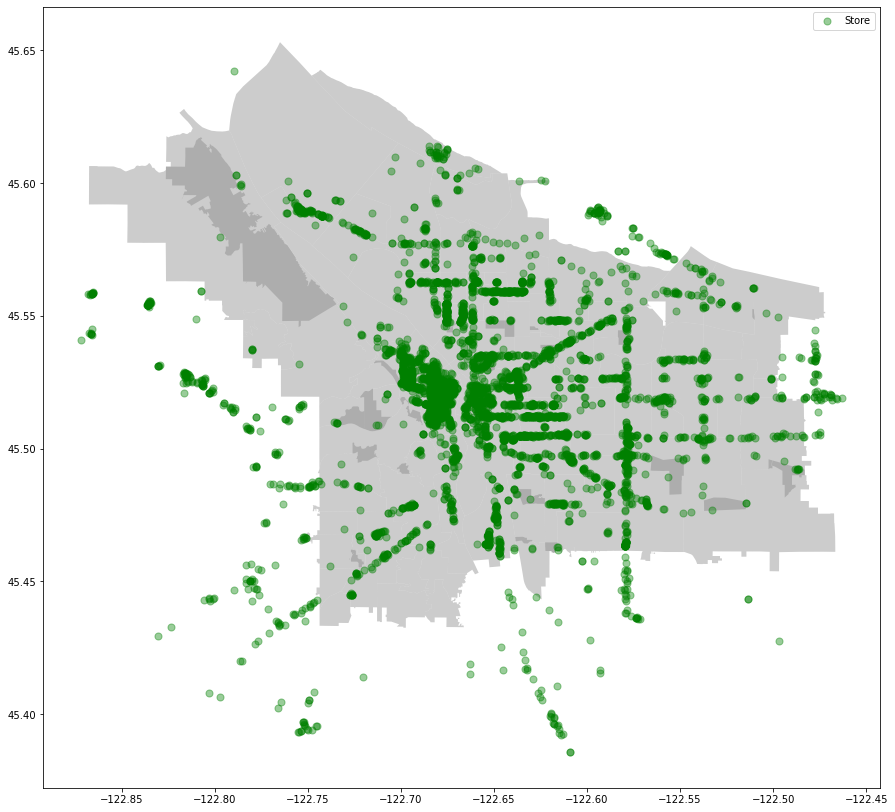

In [74]:
store_locDF=L2[0]

crs={'init':'epsg:4326'}

boroughs = geopandas.read_file("map//portland/Neighborhoods_(Regions).geojson")
boroughs = [shape(i) for i in boroughs["geometry"]]
boroughs = geopandas.GeoDataFrame({'geometry':boroughs})

geo_df=geopandas.GeoDataFrame(store_locDF,crs=crs,geometry=geopandas.points_from_xy(store_locDF["longitude"], store_locDF["latitude"]))

fig,ax=plt.subplots(figsize=(15,15))
boroughs.plot(ax=ax,alpha=0.4,color="grey")
geo_df.plot(ax=ax,markersize=50, alpha=0.4,color="green", label="Store")
plt.legend()